In [1]:
from pandas import read_csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, ADASYN

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = read_csv('01-dados/diabetes.csv',
                names=['Pregnancy', 'Glucose', 'BloodPressure' ,'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age', 'Class'])

In [3]:
data.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinfoldThickness         768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BodyMassIndex             768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


<AxesSubplot:>

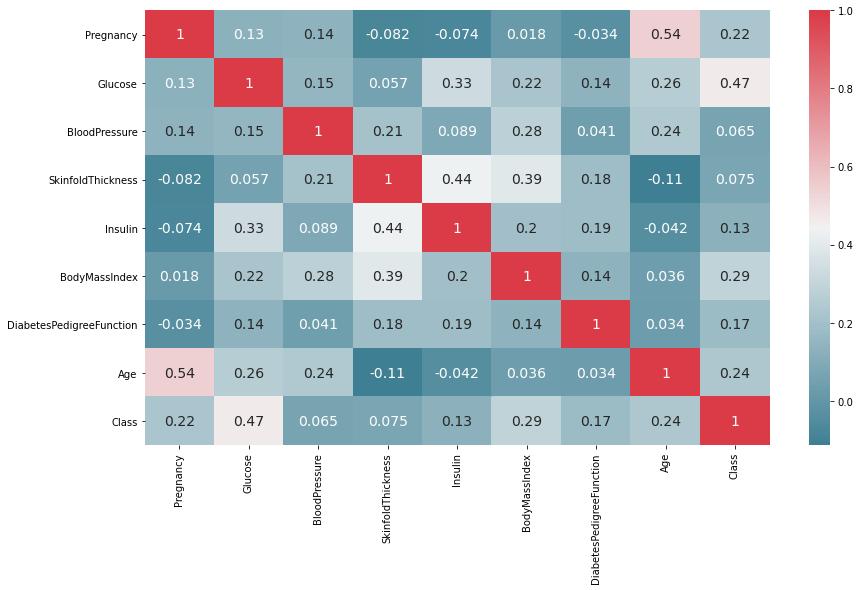

In [5]:
plt.subplots(figsize=(14,8))
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(data.corr(), cmap=cmap, annot=True, annot_kws = {'fontsize' : 14})

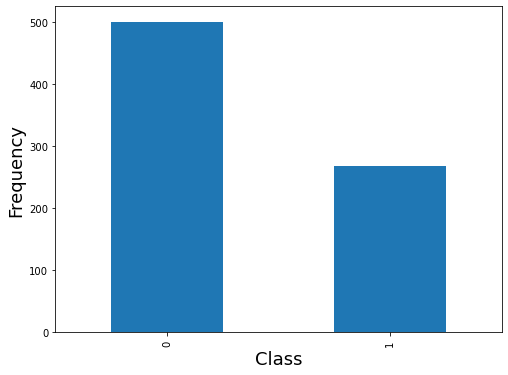

In [6]:
data['Class'].value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('Class', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

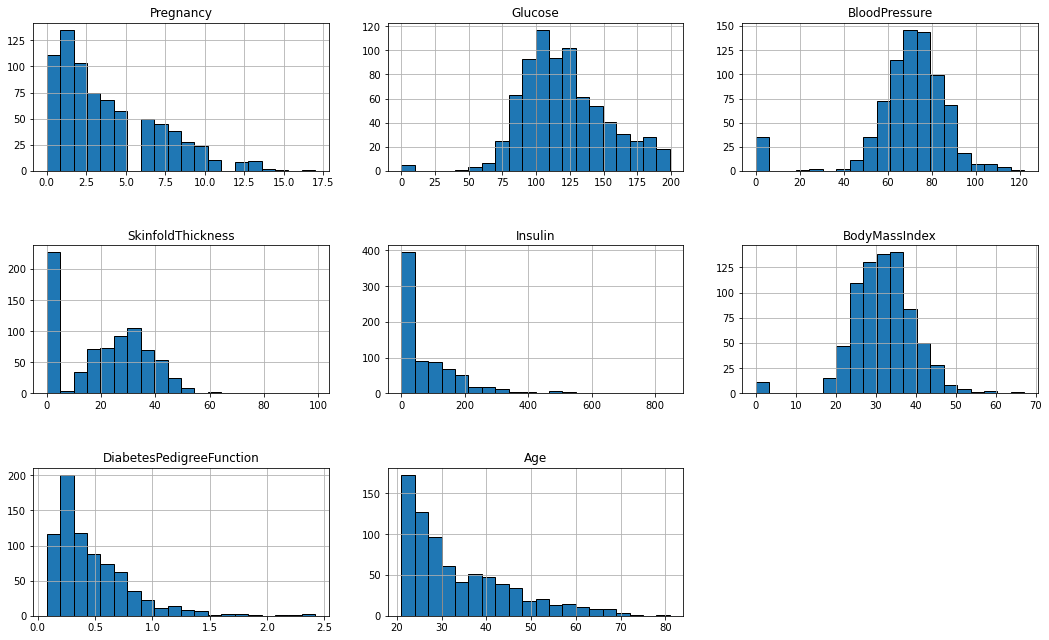

In [7]:
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho=len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

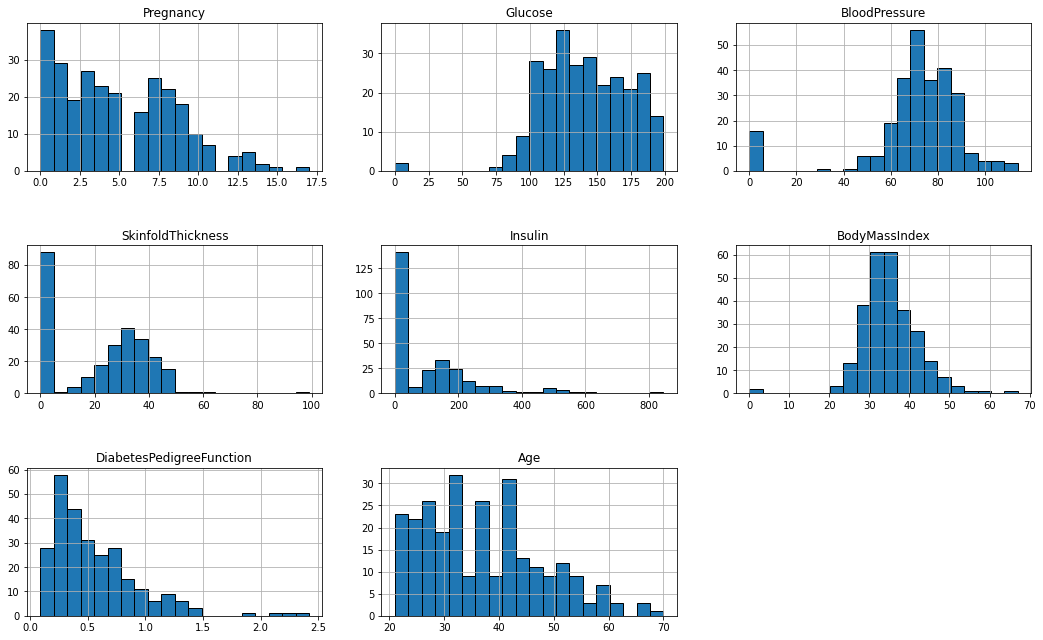

In [8]:
# Caso de biabetes
p = data[data['Class']==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho = len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=.5)
    p[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()    

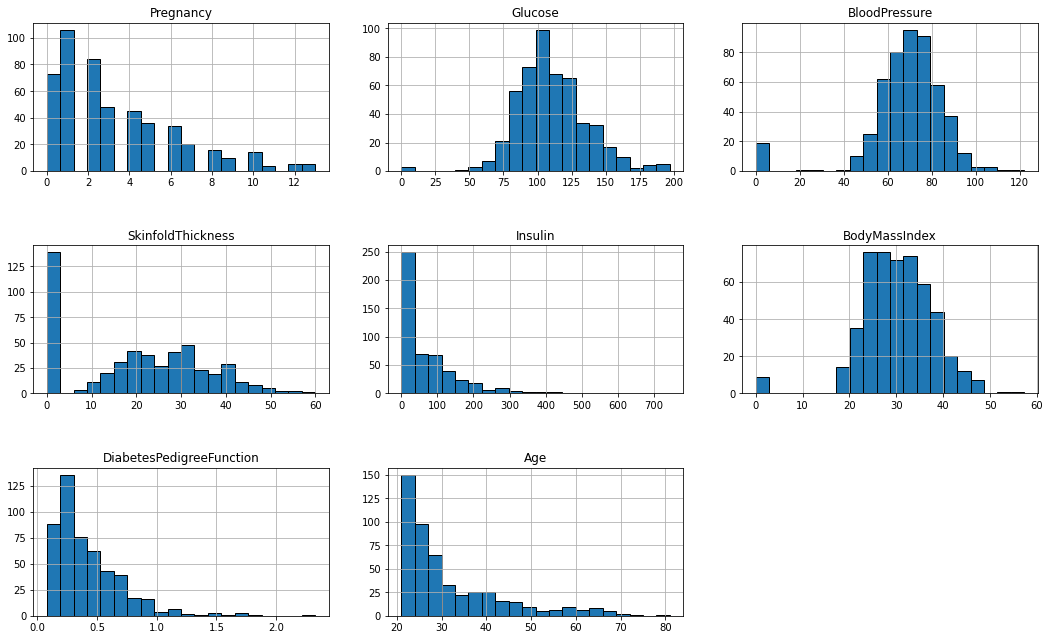

In [9]:
# Caso de biabetes
p = data[data['Class']==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho = len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=.5)
    p[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()   

Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

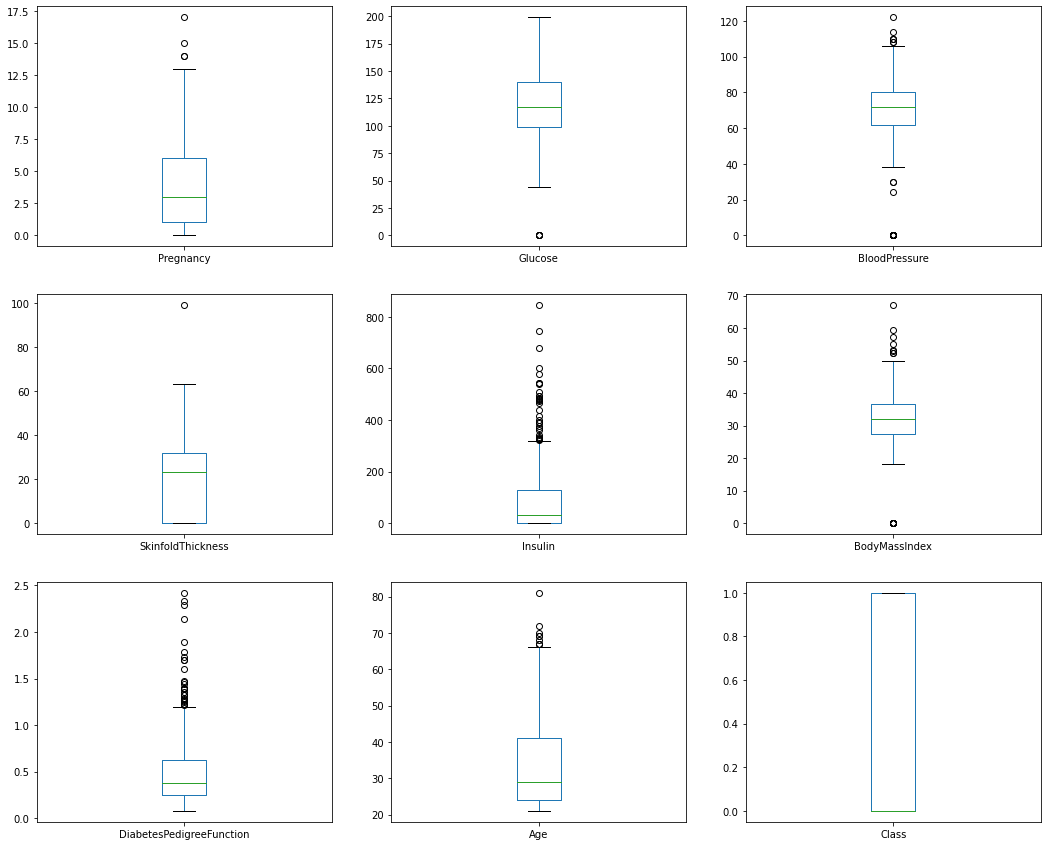

In [10]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(18,15))

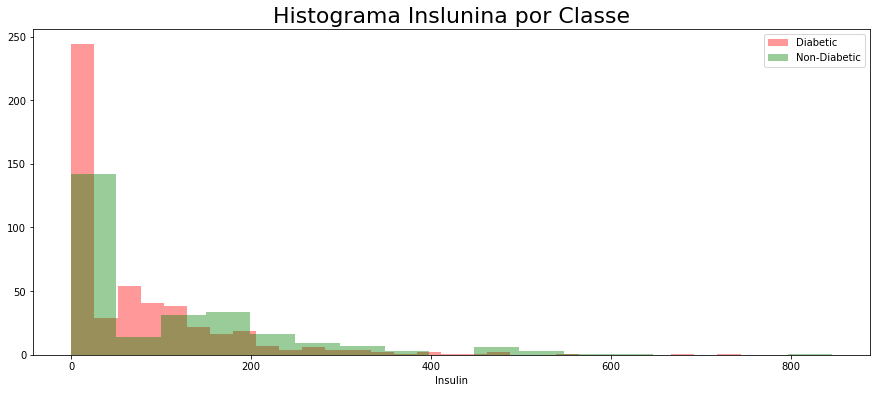

In [11]:
plt.figure(figsize=(15,6))
c = data.groupby(data['Insulin']).Class.count().reset_index()
sns.distplot(data[data.Class == 0]['Insulin'], color='red', kde=False, label='Diabetic')
sns.distplot(data[data.Class == 1]['Insulin'], color='green', kde=False, label='Non-Diabetic')
plt.legend()
plt.title('Histograma Inslunina por Classe', fontsize=22)
plt.show()

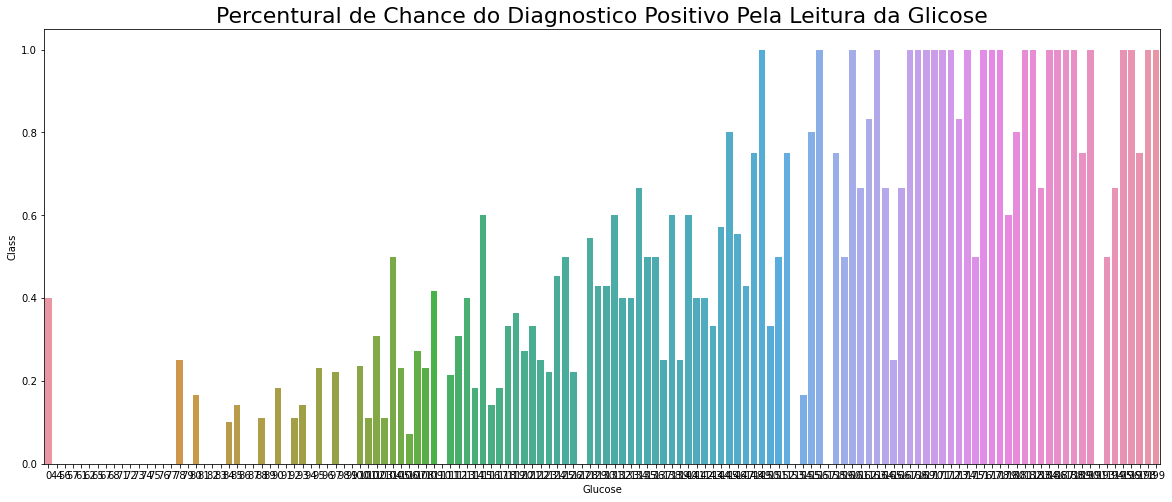

In [12]:
plt.figure(figsize=(20,8))
g = data.groupby('Glucose').Class.mean().reset_index()
sns.barplot(g.Glucose, g.Class)
plt.title('Percentural de Chance do Diagnostico Positivo Pela Leitura da Glicose', fontsize=22)
plt.show()